In [1]:
# Importing the packages
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import random
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Importing the dataset
df = pd.read_csv('dataset_phishing.csv')
df.drop(['url'], axis=1, inplace=True)
#df.head(50)


In [4]:
# if your dataset contains missing value, check which column has missing values
#df.isnull().sum()

In [5]:
#df.dropna(inplace=True)

In [6]:
from sklearn import preprocessing


col = [df.columns[-1]]

lab_en= preprocessing.LabelEncoder()

for c in col:
    df[c]= lab_en.fit_transform(df[c])

#df.head(50)

In [7]:
##print(df.corr()['Result'].sort_values())
## correlation values of features with target label
corr_col = abs(df.corr()['status']).sort_values(ascending=False)
corr_col = corr_col.rename_axis('Col').reset_index(name='Correlation')
corr_col

,Col,Correlation
0,status,1.000000e+00
1,google_index,7.311708e-01
2,page_rank,5.111371e-01
3,nb_www,4.434677e-01
4,ratio_digits_url,3.563946e-01
5,domain_in_title,3.428070e-01
6,nb_hyperlinks,3.426283e-01
7,phish_hints,3.353927e-01
8,domain_age,3.318891e-01
9,ip,3.216978e-01


In [8]:
def correlation (corr_col, threshold):
	corr_feature = set()
	for index, row in corr_col.iterrows():
		if row['Correlation'] < threshold or np.isnan(row['Correlation']):
			corr_feature.add(row['Col'])
	return corr_feature

In [9]:
corr_feature = correlation(corr_col,.04)
len(set(corr_feature))


25

In [10]:
corr_feature


{'char_repeat',
 'iframe',
 'login_form',
 'nb_comma',
 'nb_dollar',
 'nb_or',
 'nb_percent',
 'nb_redirection',
 'nb_space',
 'nb_star',
 'nb_tilde',
 'nb_underscore',
 'onmouseover',
 'path_extension',
 'port',
 'punycode',
 'random_domain',
 'ratio_extErrors',
 'ratio_intErrors',
 'ratio_intRedirection',
 'ratio_nullHyperlinks',
 'right_clic',
 'sfh',
 'shortest_words_raw',
 'submit_email'}

In [11]:
df.drop(corr_feature, axis=1, inplace=True)

In [12]:
len(df.columns)


63

In [13]:
#df.head()

In [14]:
a=len(df[df.status==0])
b=len(df[df.status==1])


In [15]:
print("Count of Legitimate Websites = ", a)
print("Count of Phishy Websites = ", b)

Count of Legitimate Websites =  5715
Count of Phishy Websites =  5715


In [16]:
X = df.drop(['status'], axis=1, inplace=False)
#X.head()
#same work
##inplace true modifies the og data & does not return anything
##inplace false does not modify og data but returns something whoch we store in a var
# X= df.drop(columns='Result')
# X.head()

In [18]:
#df.head()

In [19]:
y = df['status']
y = pd.DataFrame(y)
y.head()

,status
0,0
1,1
2,1
3,0
4,0


In [20]:
# separate dataset into train and test
from cProfile import label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8001, 1), (3429, 1), (8001, 1), (3429, 1))

In [21]:
#X_test.head()

In [22]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8001 samples.
Testing set has 3429 samples.


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

col_X_train = [X_train.columns[:]]

for c in col_X_train:
    X_train[c]= scaler.fit_transform(X_train[c])

#X_train.head(5)

In [24]:
col_X_test = [X_test.columns[:]]

for c in col_X_test:
    X_test[c]= scaler.transform(X_test[c])

#X_test.head(5)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {'penalty' : ['l2'],
            'C' : [10, 20, 30], #0.1, 1, 10, 20, 
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [2500]} #5000

grid_logr = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_logr.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_logr.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logr.best_estimator_)
print(grid_logr.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'C': 10, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=10, max_iter=2500)
0.8661427902621721


In [26]:
logr_model = grid_logr.best_estimator_

# Performing training
#logr_model = logr.fit(X_train, y_train.values.ravel())

In [27]:
logr_predict  =  logr_model.predict(X_test)

In [28]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm = confusion_matrix(y_test, dct_pred)
# ac = accuracy_score(y_test, dct_pred)

In [29]:
print ("Accuracy of logr classifier : ", accuracy_score(y_test, logr_predict)*100)

Accuracy of logr classifier :  86.14756488772237


In [30]:
print(classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



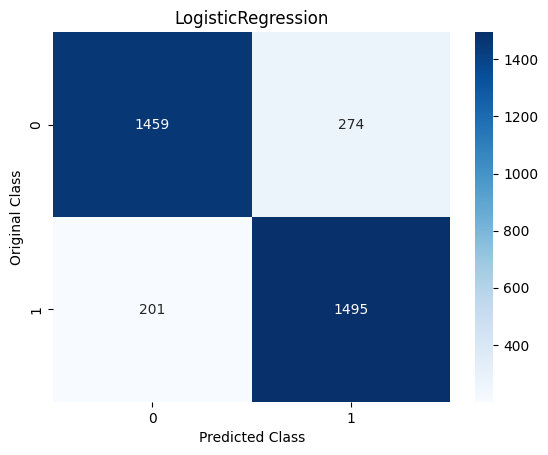

In [31]:
sns.heatmap(confusion_matrix(y_test, logr_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LogisticRegression")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [32]:
# from sklearn.neighbors import KNeighborsClassifier

# #training_accuracy=[]
# test_accuracy=[]

# neighbors=range(1,10)
# ##values.ravel() converts vector y to flattened array
# for i in neighbors:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn_model = knn.fit(X_train,y_train.values.ravel())
#     #training_accuracy.append(knn.score(X_train,y_train.values.ravel()))
#     test_accuracy.append(knn_model.score(X_test,y_test.values.ravel()))

In [33]:
# plt.plot(neighbors,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")
# plt.legend()
# plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)
0.8661427902621721


In [35]:
knn_model = grid_knn.best_estimator_
#knn_model = knn.fit(X_train,y_train.values.ravel())

In [36]:
#print ("Accuracy of knn classifier: ", max(test_accuracy)*100)
knn_predict = knn_model.predict(X_test)

In [37]:
print('The accuracy of knn Classifier is: ', 100.0 * accuracy_score(y_test, knn_predict))

The accuracy of knn Classifier is:  86.14756488772237


In [38]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



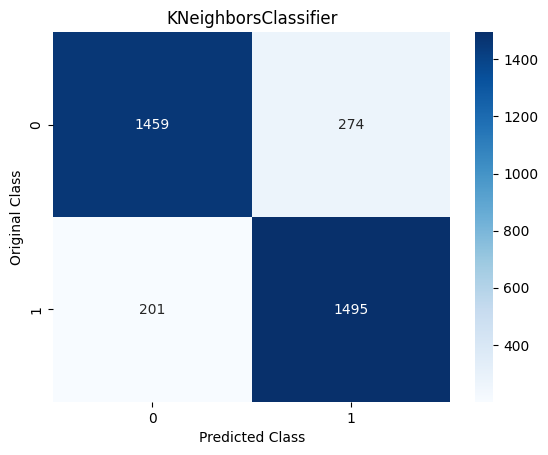

In [39]:
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, fmt='g', cmap='Blues')
plt.title("KNeighborsClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [40]:
# # here is the change
# knn_y_pred_proba = knn.predict_proba(X_test)
# knn_y_pred_proba_positive = knn_y_pred_proba[:, 1] 

# RocCurveDisplay.from_predictions(y_test,knn_y_pred_proba_positive)

# fig, ax = plt.subplots()
# RocCurveDisplay.from_estimator(
#    logreg, X_test, y_test, ax = ax)

# logreg_y_decision = logreg.decision_function(X_test)
# metrics.RocCurveDisplay.from_predictions(y_test,logreg_y_decision,ax=ax,name="logreg predictions")

In [41]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [1, 10],  #0.1, 1, 10
			'gamma': [1, 0.1], #
			'kernel': ['rbf']}   #'linear','poly', 'rbf', 'sigmoid'

grid_svc = GridSearchCV(SVC(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_svc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)
print(grid_svc.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
0.8661427902621721


In [42]:
svc_model = grid_svc.best_estimator_
#svc_model = svc.fit(X_train,y_train.values.ravel())

In [43]:
svc_predict = svc_model.predict(X_test)

In [44]:
print('The accuracy of svc Classifier is: ', 100.0 * accuracy_score(y_test, svc_predict))

The accuracy of svc Classifier is:  86.14756488772237


In [45]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



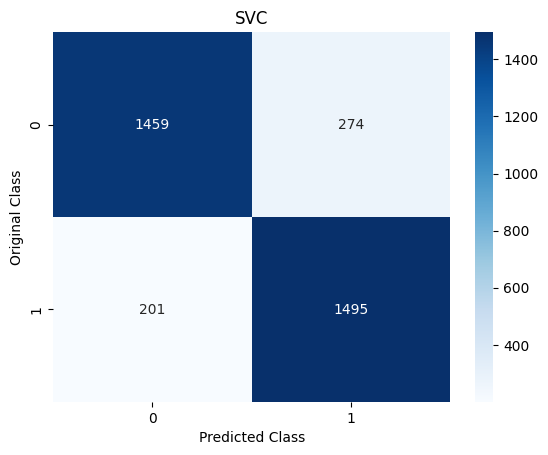

In [46]:
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("SVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [47]:
from sklearn.svm import NuSVC

# defining parameter range
param_grid = {'nu': [0.1], #.5
			'gamma': [.1,1],  #1,.01
			'kernel': ['rbf']} #'linear','poly', 'rbf', 'sigmoid'

grid_nusvc = GridSearchCV(NuSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_nusvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_nusvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_nusvc.best_estimator_)
print(grid_nusvc.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

In [ ]:
nusvc_model = grid_nusvc.best_estimator_
#nusvc_model = nusvc.fit(X_train, y_train.values.ravel())


In [ ]:
nusvc_predict = nusvc_model.predict(X_test)

In [ ]:
print('The accuracy of nusvc Classifier is: ', 100.0 * accuracy_score(y_test, nusvc_predict))

The accuracy of nusvc Classifier is:  95.7713619130942


In [ ]:
print(classification_report(y_test, nusvc_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1733
           1       0.97      0.95      0.96      1696

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



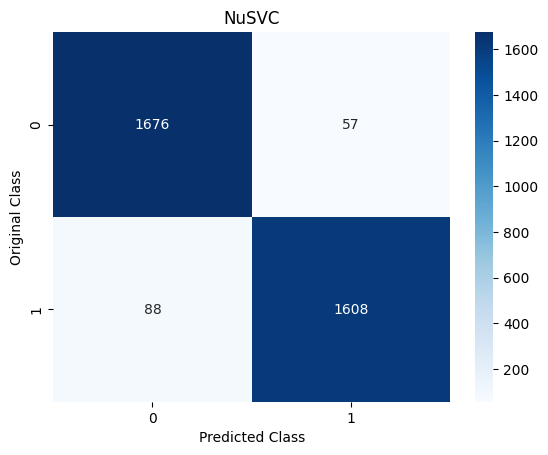

In [ ]:
sns.heatmap(confusion_matrix(y_test, nusvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("NuSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [51]:
from sklearn.svm import LinearSVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20, 30],
			'penalty': ['l1','l2'],
			'loss': ['squared_hinge'],
			'dual': [False],
			'tol': [.1,.01,.001]}

grid_lsvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_lsvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_lsvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_lsvc.best_estimator_)
print(grid_lsvc.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1', 'tol': 0.1}
LinearSVC(C=0.1, dual=False, penalty='l1', tol=0.1)
0.8661427902621721


In [52]:
lsvc_model = grid_lsvc.best_estimator_
#lsvc_model = lsvc.fit(X_train, y_train.values.ravel())

In [53]:
lsvc_predict = lsvc_model.predict(X_test)

In [54]:
print('The accuracy of lsvc Classifier is: ', 100.0 * accuracy_score(y_test, lsvc_predict))

The accuracy of lsvc Classifier is:  86.14756488772237


In [55]:
print(classification_report(y_test, lsvc_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



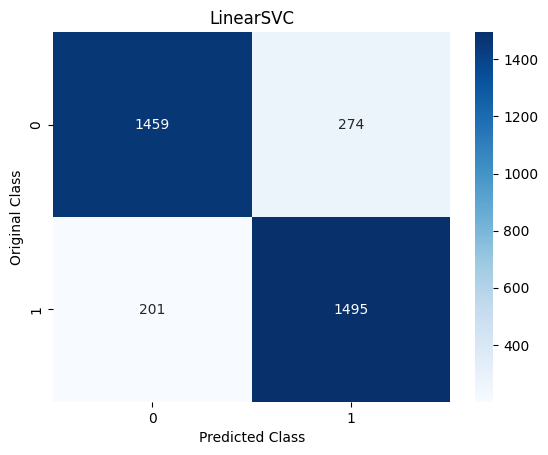

In [56]:
sns.heatmap(confusion_matrix(y_test, lsvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LinearSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [57]:
from sklearn.ensemble import AdaBoostClassifier

# defining parameter range
param_grid = {'n_estimators': [100,200,300]}

grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_ada.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_ada.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'n_estimators': 100}
AdaBoostClassifier(n_estimators=100)
0.8661427902621721


In [58]:
ada_model = grid_ada.best_estimator_
#ada_model = ada.fit(X_train,y_train.values.ravel())

In [59]:
ada_predict = ada_model.predict(X_test)

In [60]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(ada_predict,y_test))

The accuracy of Ada Boost Classifier is:  86.14756488772237


In [61]:
print(classification_report(y_test, ada_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



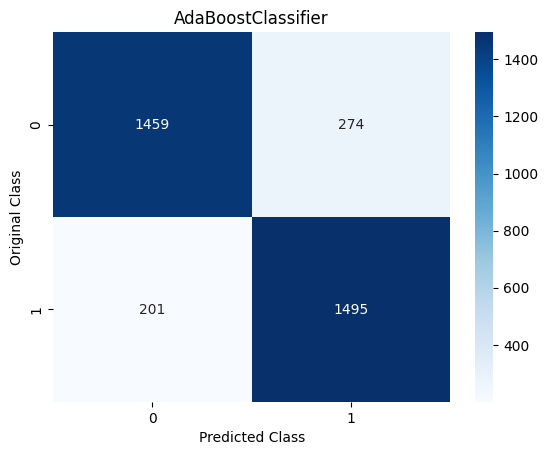

In [62]:
sns.heatmap(confusion_matrix(y_test, ada_predict), annot=True, fmt='g', cmap='Blues')
plt.title("AdaBoostClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [63]:
from xgboost import XGBClassifier


# defining parameter range
param_grid = {
    "gamma": [.01, .1, .5], #
    "n_estimators": [150,200,250]
}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_xgb.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_xgb.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)


Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'gamma': 0.01, 'n_estimators': 150}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.8661427902621721


In [64]:
xgb_model = grid_xgb.best_estimator_
#xgb_model = xgb.fit(X_train,y_train)

In [65]:
xgb_predict=xgb_model.predict(X_test)

In [66]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,y_test))

The accuracy of XGBoost Classifier is:  86.14756488772237


In [67]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



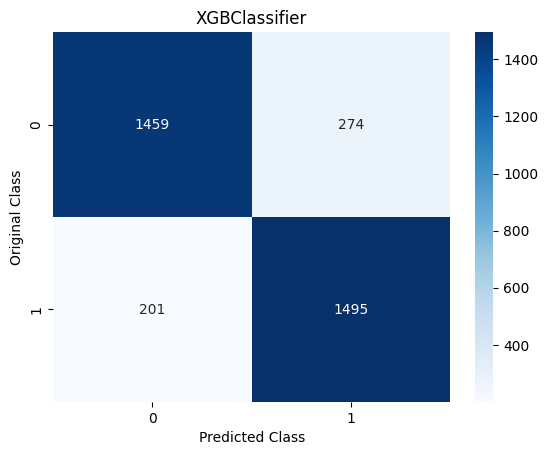

In [68]:
sns.heatmap(confusion_matrix(y_test, xgb_predict), annot=True, fmt='g', cmap='Blues')
plt.title("XGBClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# defining parameter range
param_grid = {
    "learning_rate": [.5], #.1,.5,1
    "n_estimators": [150,200,250]
}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_gbc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_gbc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'learning_rate': 0.5, 'n_estimators': 150}
GradientBoostingClassifier(learning_rate=0.5, n_estimators=150)
0.8661427902621721


In [70]:
gbc_model = grid_gbc.best_estimator_
#gbc_model = gbc.fit(X_train,y_train.values.ravel())

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [71]:
gbc_predict = gbc_model.predict(X_test)

In [72]:
print('The accuracy of GradientBoost Classifier is: ' , 100.0 * accuracy_score(gbc_predict,y_test))

The accuracy of GradientBoost Classifier is:  86.14756488772237


In [73]:
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



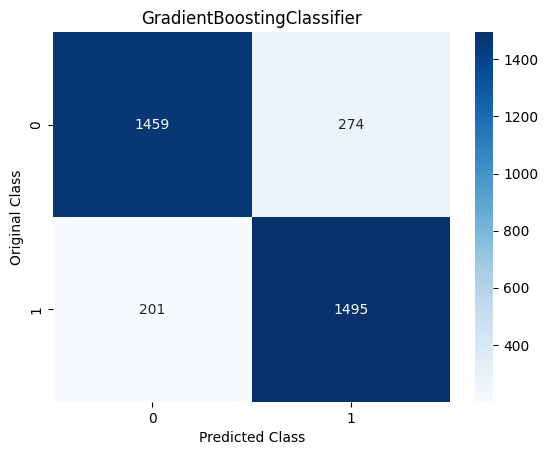

In [74]:
sns.heatmap(confusion_matrix(y_test, gbc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("GradientBoostingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [75]:
# gbc_model.get_params().keys()

In [76]:
# import inspect
# import sklearn
# import xgboost

# models = [xgboost.XGBClassifier]
# for m in models:
#     hyperparams = inspect.signature(m.__init__)
#     print(hyperparams)
# #or
# xgb_model.get_params().keys()


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# defining parameter range
param_grid = {
    "base_estimator": [DecisionTreeClassifier()],
    "n_estimators": [150,200,250]
}

grid_bag = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_bag.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_bag.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_bag.best_estimator_)
print(grid_bag.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 150}
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150)
0.8661427902621721


In [78]:
bag_model = grid_bag.best_estimator_
#bag_model = bag.fit(X_train, y_train.values.ravel())


In [79]:
bag_predict = bag_model.predict(X_test)

In [80]:
print('The accuracy of Bagging Classifier is: ' , 100.0 * accuracy_score(y_test, bag_predict))

The accuracy of Bagging Classifier is:  86.14756488772237


In [81]:
print(classification_report(y_test, bag_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



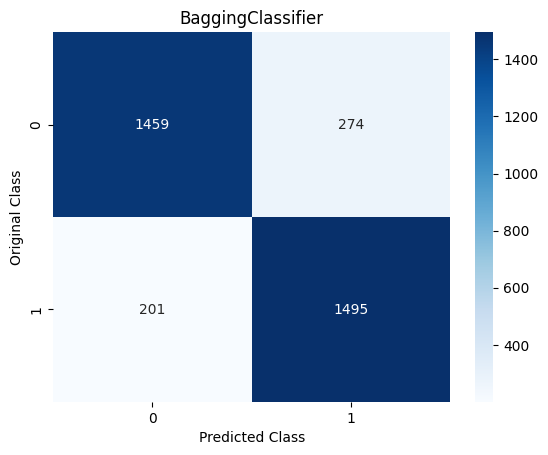

In [82]:
sns.heatmap(confusion_matrix(y_test, bag_predict), annot=True, fmt='g', cmap='Blues')
plt.title("BaggingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier

# defining parameter range
param_grid = {
    "n_estimators": [50,100,150,200]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_rfc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_rfc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'n_estimators': 50}
RandomForestClassifier(n_estimators=50)
0.8661427902621721


In [84]:
rfc_model = grid_rfc.best_estimator_
#rfc_model = rfc.fit(X_train,y_train.values.ravel())

In [85]:
rfc_predict = rfc_model.predict(X_test)

In [86]:
print('The accuracy of RandomForest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of RandomForest Classifier is:  86.14756488772237


In [87]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1733
           1       0.85      0.88      0.86      1696

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



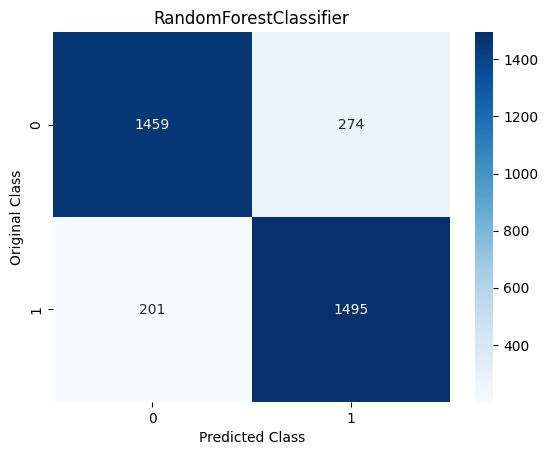

In [88]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("RandomForestClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

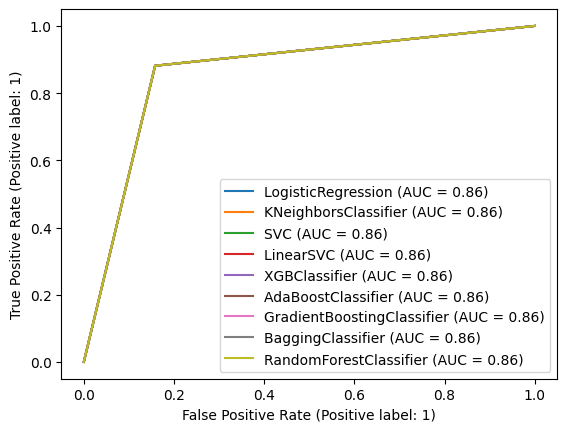

In [90]:
estimators = [logr_model,knn_model,svc_model,nusvc_model,lsvc_model,xgb_model,ada_model,gbc_model,bag_model,rfc_model]

for estimator in estimators:
    RocCurveDisplay.from_estimator(estimator,X_test,y_test,ax=plt.gca())


In [95]:
import tensorflow as tf
#from tensorflow.keras.datasets import imdb
from keras.layers import Embedding, Dense, LSTM, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 32
#embedding_output_dims = (X_train.shape[1])
loss_function = BinaryCrossentropy()
#max_sequence_length = (X_train.shape[1])
#num_distinct_words = (X_train.shape[1])
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# reshape from [samples, features] into [samples, timesteps, features]
timesteps = 1
X_train_reshape = X_train.values.ravel().reshape(X_train.shape[0],timesteps, X_train.shape[1])
X_test_reshape = X_test.values.ravel().reshape(X_test.shape[0],timesteps, X_test.shape[1])

# Disable eager execution
#tf.compat.v1.disable_eager_execution()

# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
# print(x_train.shape)
# print(x_test.shape)

# Pad all sequences
# padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
# padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
def build_model_lstm():
    model = Sequential()
    #model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
    model.add(LSTM(100, input_shape = (timesteps,X_train_reshape.shape[2])))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
    return model

#from keras.wrappers.scikit_learn import KerasClassifier
lstm_model = build_model_lstm()
# Give a summary
lstm_model.summary()

# Train the model
history = lstm_model.fit(X_train_reshape, y_train.values.ravel(), batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
#lstm_predict = lstm_model.predict(X_test_reshape)
test_results = lstm_model.evaluate(X_test_reshape, y_test.values.ravel(), verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

ImportError: Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\pywrap_tensorflow.py", line 62, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The paging file is too small for this operation to complete.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
lstm_predict_proba = lstm_model.predict(X_test_reshape, batch_size=32)
lstm_predict_class = (lstm_predict_proba > 0.5).astype("int32")
print(classification_report(y_test, lstm_predict_class))

108/108 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1733
           1       0.96      0.94      0.95      1696

    accuracy                           0.96      3429
   macro avg       0.96      0.95      0.96      3429
weighted avg       0.96      0.96      0.96      3429



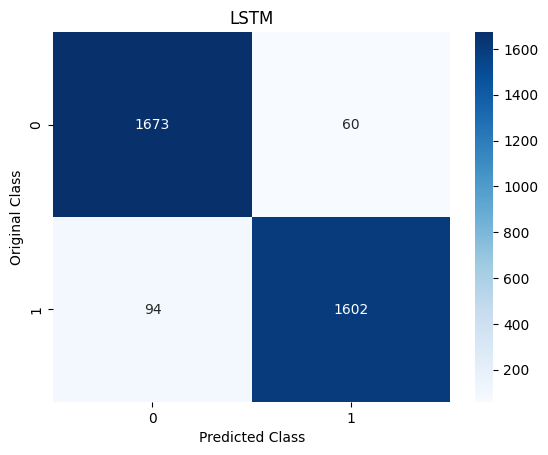

In [ ]:
sns.heatmap(confusion_matrix(y_test, lstm_predict_class), annot=True, fmt='g', cmap='Blues')
plt.title("LSTM")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


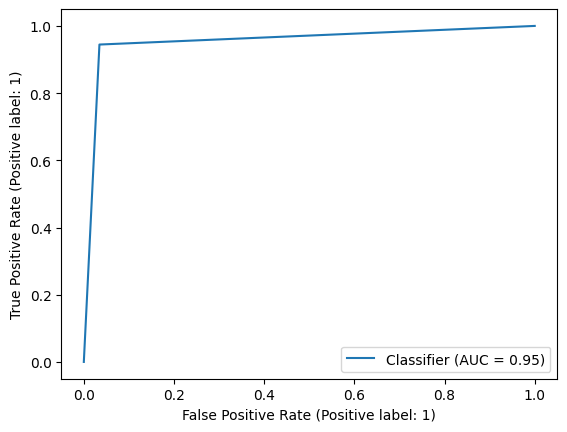

In [ ]:
RocCurveDisplay.from_predictions(y_test,lstm_predict_class)
plt.show()